# Inference test
This is a simple notebook to test the inference interface of Roboflow using pretrained models.
You only need to change the values of the variables underneath to suit your needs

In [10]:
#!pip install inference
#Uncomment the line above if the inference library is not pre-installed 

In [11]:
################################
#Relevant Variables#############
################################
model_id_ = "general-mahjong-detection-small/5"
api_key_ = "f5pOg5frjQ3XAImBbLxX"
image_filenames = ["jmj.png","hkmj.jpg","custom.jpeg"]

/home/innoai/.local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(
/home/innoai/.local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'OpenVINOExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


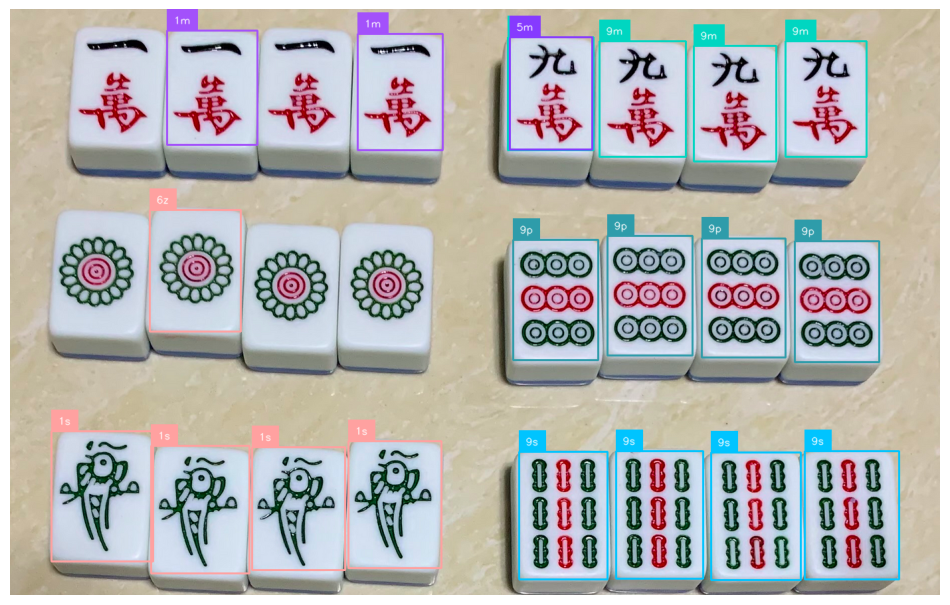

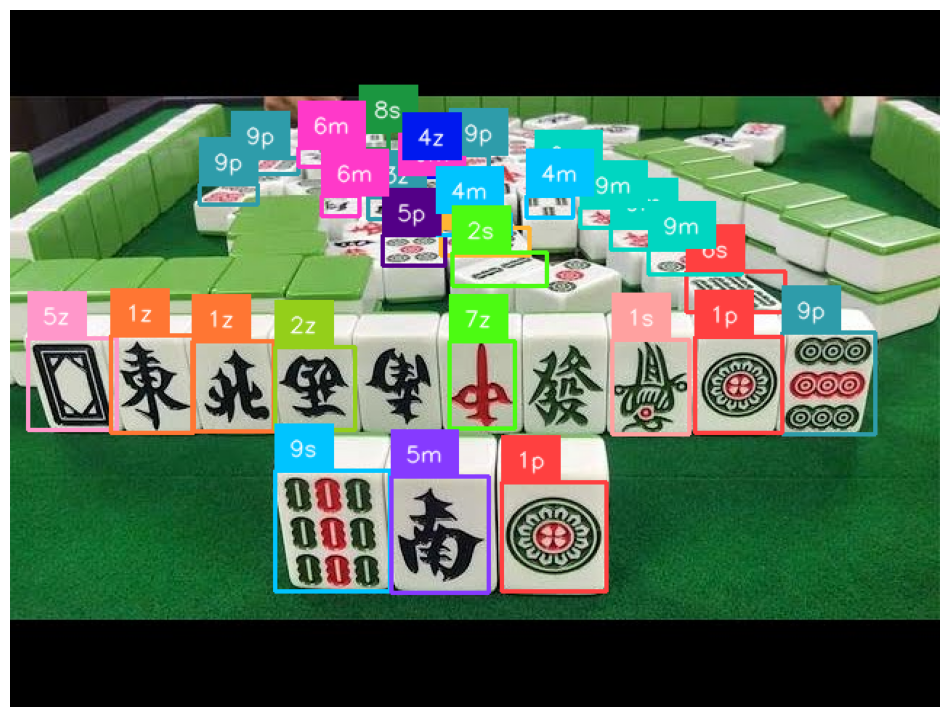

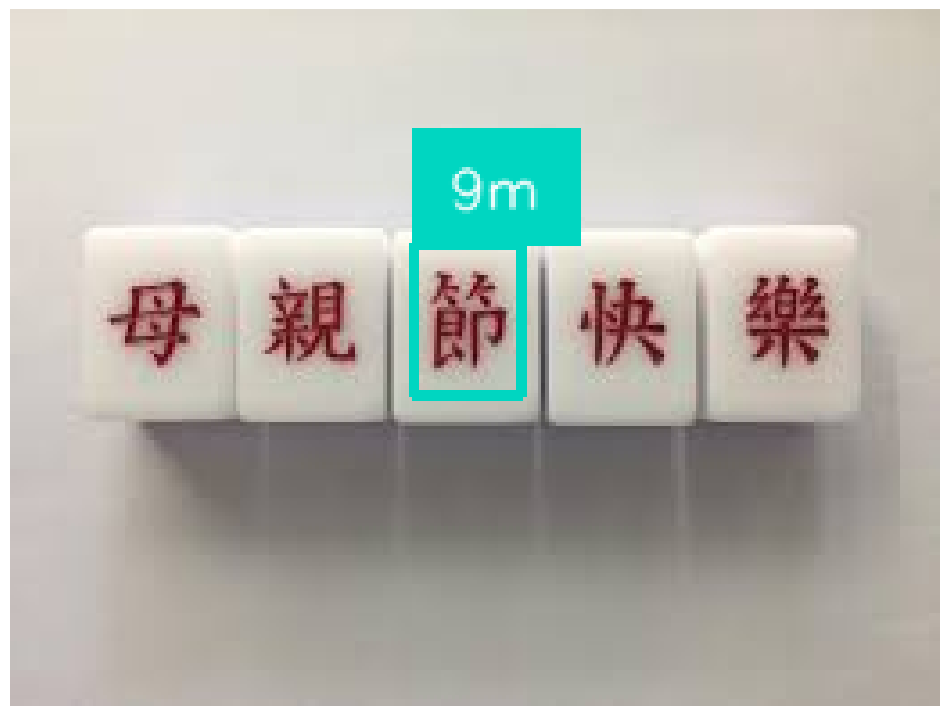

In [12]:
# import a utility function for loading Roboflow models
from inference import get_model
import supervision as sv
import cv2

#import the image(s) and prepare into a readable format
images = []
for pic in image_filenames:
    images.append(cv2.imread(pic))

# load a pre-trained yolov8n model
model = get_model(model_id=model_id_, api_key=api_key_)

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
#Run inference on the images. The function supports url, numpy array, PIL image... as inputs
#Then, load the results into the supervision Detections api, create annotators, annotate the image with the inference results, and display it. 
for image in images:
    results = model.infer(image)
    detections = sv.Detections.from_inference(results[0].dict(by_alias=True, exclude_none=True))
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)
    sv.plot_image(annotated_image)